# **Machine Learning with Spotify: A Beginner's Guide to Decision Trees**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Silhouette_of_bare_tree_branches_under_twilight_sky.jpg/640px-Silhouette_of_bare_tree_branches_under_twilight_sky.jpg" width="400">

A Decision Tree is a powerful and popular tool in machine learning that works like a flowchart. It makes decisions by asking a series of simple "if-then" questions about the data. Think of it like a game of 20 questions—each question narrows down the possibilities until a final conclusion is reached.

Decision trees are an excellent introduction to machine learning for several key reasons:

- They are intuitive and easy to understand. The visual, flowchart-like structure makes it easy to see exactly how the model is making its decisions. You don't need complex math to follow the logic.

- They mirror human thinking. The process of splitting data based on a series of questions is very similar to how people often make decisions in their daily lives.

- They provide a great foundation. Understanding how a single decision tree works is the first step to learning more advanced and powerful models, like Random Forests.

Decision trees are a type of supervised learning. This means we train the model on a dataset that already has the correct answers, or labels. The tree's job is to learn the relationship between the input data (the "features") and the known output labels, so it can make accurate predictions on new, unlabeled data.

We will use a dataset from Spotify and build a **Decision Tree** model.



### **1. Understanding the Data**

Spotify analyzes songs and gives them a set of attributes. In machine learning, we call these **features**. These features describe the characteristics of each song. Here are a few we'll be working with:

* **`danceability`**: How suitable a track is for dancing (0.0 is least danceable, 1.0 is most danceable).
* **`energy`**: A measure of intensity and activity (0.0 is low energy, 1.0 is high energy).
* **`acousticness`**: A measure of whether the track is acoustic (0.0 is not acoustic, 1.0 is acoustic).
* **`valence`**: A measure of musical positiveness (0.0 is negative/sad, 1.0 is positive/happy).
* **`liveness`**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
* **`instrumentalness`**: Predicts whether a track contains no vocals. Values closer to 1.0 mean it's more likely to be an instrumental track.
* **`speechiness`**: Detects the presence of spoken words. A higher value indicates the presence of more spoken words.

Our goal is to use these features to predict whether a song is **country** or **rap**.

### **2. Setting Up Our Workspace**

We will be using several libraries in this notebook:

- `pandas`for data analysis and manipulation.

- `matplotlib.pyplot` for creating visualizations.

- scikit-learn (`sklearn`): The primary machine learning library in Python. We use several of its components:
  - `model_selection`: To split our data into training, validation, and test sets
  - `tree`: To build and visualize our `DecisionTreeClassifier`.
  - `metrics`: To evaluate our model's performance using `accuracy_score`.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [28]:
# Load the Spotify dataset
spotify = pd.read_csv('https://raw.githubusercontent.com/jdomyancich/big-data-camp/refs/heads/main/data/spotify_all_genres_tracks.csv')
spotify.head()

,track_id,playlist_url,playlist_name,track_name,track_popularity,artist_name,album,album_cover,artist_genres,artist_popularity,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,4Gia17DzXBhYFbYiJj6SyW,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Working Man,51,Otis Rush,Mourning In The Morning,https://i.scdn.co/image/ab67616d0000b273fea221...,"['blues', 'blues rock', 'chicago blues', 'elec...",41,...,1,0.0436,0.492,0.000418,0.204,0.841,103.355,147800,4,blues
1,1BjYNhg7JhVfQdxqEThBwn,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Long Way Home,38,"Clarence ""Gatemouth"" Brown",Long Way Home,https://i.scdn.co/image/ab67616d0000b2730e1f13...,"['blues', 'blues rock', 'memphis blues', 'mode...",33,...,0,0.0380,0.910,0.048000,0.120,0.425,78.033,338333,4,blues
2,2Cg3GUkhjX96nO4p2WRlIa,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,She's A Sweet One,49,Junior Wells,"Calling All Blues - The Chief, Profile & USA R...",https://i.scdn.co/image/ab67616d0000b27399b18c...,"['blues', 'blues rock', 'chicago blues', 'elec...",41,...,1,0.0542,0.150,0.026500,0.202,0.713,122.863,181786,4,blues
3,5bC6ONDsL88snGN6QasjZH,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Help Me,59,Sonny Boy Williamson II,More Real Folk Blues,https://i.scdn.co/image/ab67616d0000b273b48c81...,"['acoustic blues', 'blues', 'blues rock', 'chi...",46,...,0,0.0430,0.597,0.021300,0.610,0.771,114.216,188200,4,blues
4,2TKykeHeVKsBqZC8M3SKcN,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Take Out Some Insurance,51,Jimmy Reed,Rockin' With Reed,https://i.scdn.co/image/ab67616d0000b2739b7573...,"['blues', 'blues rock', 'chicago blues', 'elec...",42,...,1,0.0513,0.663,0.000000,0.122,0.566,111.330,143332,4,blues


In [29]:
# Check the unique genres
spotify['genre'].unique()

array(['blues', 'classical', 'jazz', 'hiphop', 'pop', 'reggae', 'rock',
       'electronic'], dtype=object)

In [30]:
# Get the summary statistics for the numerical data
spotify.describe()

,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,9198.000000,9198.000000,9198.000000,9198.000000,9198.000000,9198.000000,9198.000000,9198.000000,9198.000000,9198.000000,9198.000000,9198.000000,9198.000000,9.198000e+03,9198.000000
mean,48.891716,51.161883,0.595363,0.535862,5.359209,-10.706267,0.596434,0.084681,0.362225,0.227429,0.170279,0.502993,116.589396,2.532825e+05,3.896934
std,17.501544,16.080915,0.192927,0.273231,3.558963,6.573201,0.490639,0.081614,0.368888,0.350817,0.139707,0.265940,29.270118,1.019732e+05,0.402003
min,0.000000,0.000000,0.000000,0.000885,0.000000,-47.001000,0.000000,0.000000,0.000002,0.000000,0.014500,0.000000,0.000000,3.033300e+04,0.000000
25%,38.000000,42.000000,0.474000,0.334000,2.000000,-13.255750,0.000000,0.038200,0.030425,0.000002,0.090100,0.282000,93.983000,1.897008e+05,4.000000
50%,49.000000,52.000000,0.621000,0.578500,6.000000,-8.761500,1.000000,0.049000,0.191000,0.001675,0.116000,0.519000,117.922500,2.282670e+05,4.000000
75%,61.000000,62.000000,0.744000,0.757000,8.000000,-6.128250,1.000000,0.087500,0.731000,0.461000,0.198000,0.724000,132.697250,2.864568e+05,4.000000
max,95.000000,100.000000,0.984000,0.999000,11.000000,1.342000,1.000000,0.827000,0.996000,0.983000,0.979000,0.986000,216.090000,1.430840e+06,5.000000


### **3. Preparing the Data for Machine Learning**

A machine learning model learns from data. We need to tell it what we want to predict (the **target**) and what information it should use to make those predictions (the **features**).

* **Target (`y`):** The single thing we want to predict. In our case, the `genre`.
* **Features (`X`):** The data we use to predict the target. We'll select a few of the song attributes.

In [61]:
# Our target variable
# YOUR CODE HERE
y = spotify['genre']

# Our feature variables
# YOUR CODE HERE
features = ['valence', 'instrumentalness', 'speechiness', 'danceability', 'energy', 'loudness', 'acousticness', 'liveness', 'tempo']
X = spotify[features]

# Let's look at our features
X.head()

,valence,instrumentalness,speechiness,danceability,energy,loudness,acousticness,liveness,tempo
0,0.841,0.000418,0.0436,0.633,0.625,-10.951,0.492,0.204,103.355
1,0.425,0.048000,0.0380,0.728,0.054,-22.557,0.910,0.120,78.033
2,0.713,0.026500,0.0542,0.705,0.483,-12.209,0.150,0.202,122.863
3,0.771,0.021300,0.0430,0.745,0.436,-9.617,0.597,0.610,114.216
4,0.566,0.000000,0.0513,0.747,0.288,-14.435,0.663,0.122,111.330


#### **Splitting Our Data: Training, Validation, and Testing**

This is one of the most important concepts in machine learning! To properly evaluate our model, we split our dataset into three parts:

1.  **Training Set (70%):** The model will "study" this data to learn the patterns between the features and the song genre.
2.  **Validation Set (20%):** We use this set to **tune** our model, for example, by finding the best settings (like tree depth) that give the highest accuracy.
3.  **Test Set (10%):** This data is kept completely separate until the very end. We use it only once to get a final, unbiased measure of how our fully-tuned model performs on new, unseen songs.

We can create this three-way split by using the `train_test_split` function twice.

In [63]:
# First, split the data into a 70% training set and a 30% temporary set
# We use 'stratify=y' to ensure the genre proportions are the same in the train and temp sets

# YOUR CODE HERE

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

Next, split the 30% temporary set into a 20% validation and 10% test set. The test set will be 1/3 of the temporary set (10% of the original total)

In [64]:
# YOUR CODE HERE

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = (1/3), random_state = 1, stratify = y_temp)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (6438, 9)
Validation set shape: (1840, 9)
Test set shape: (920, 9)


### **4. Building and Visualizing Our First Decision Tree**

Now for the fun part! We'll create a Decision Tree model. Think of a decision tree like a flowchart of "if-then" questions that the model learns to ask to determine a song's genre.

To make it easy to understand, we'll start with a very simple tree by setting `max_leaf_nodes=5`. This means the tree can have at most 5 final decision points (leaves).

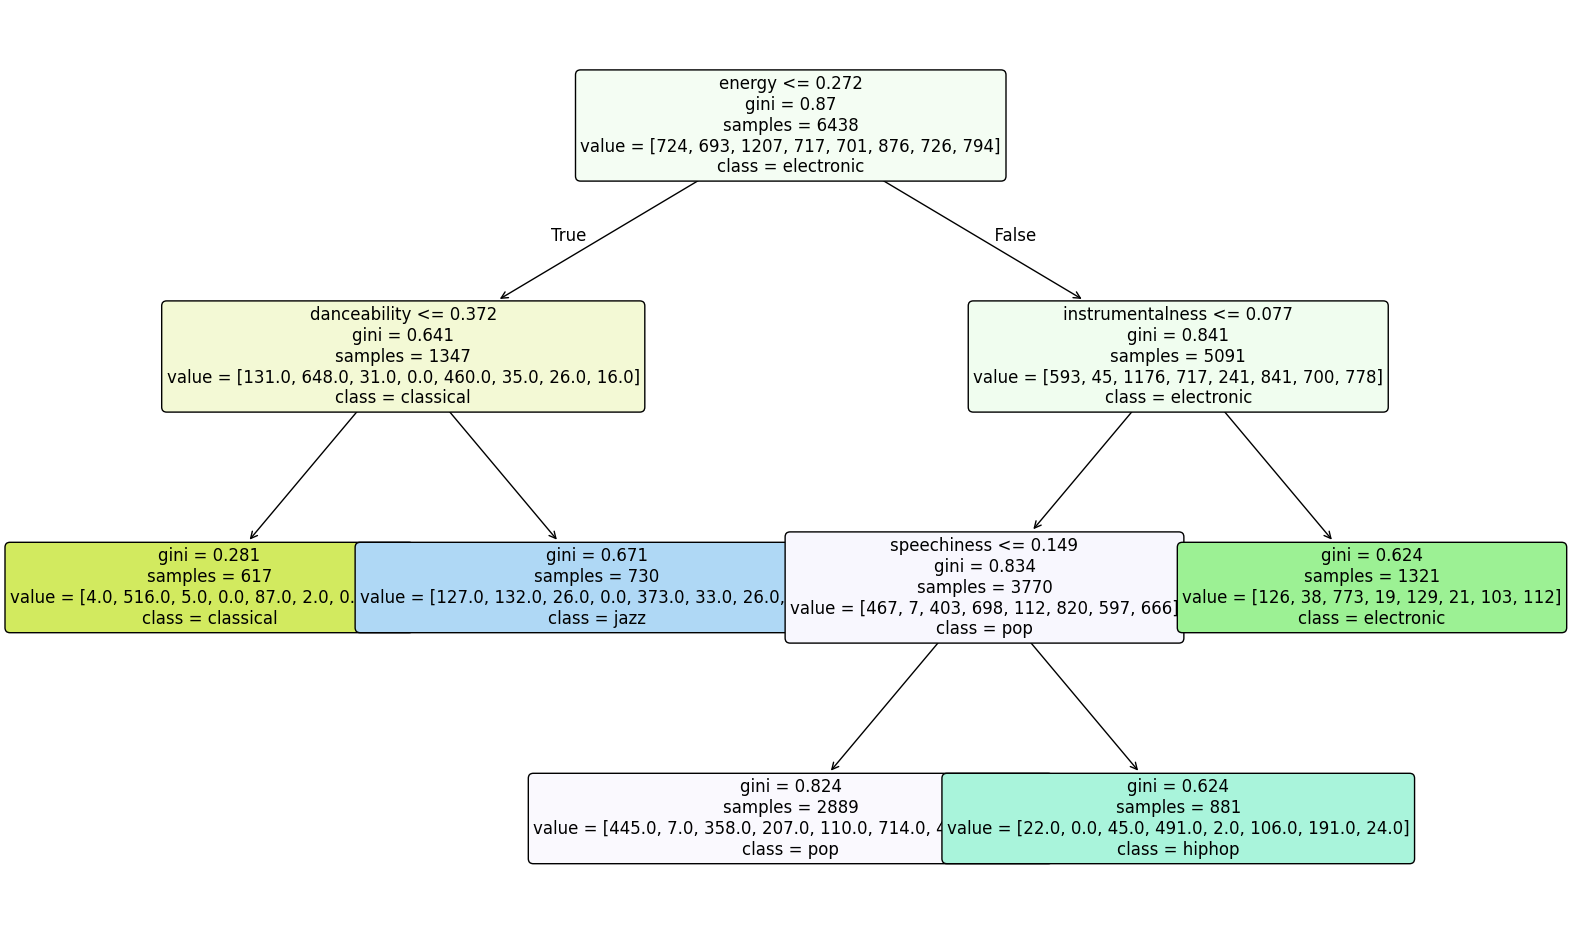

In [34]:
# Create a simple decision tree model
# YOUR CODE HERE
simple_model = DecisionTreeClassifier(max_leaf_nodes= 5, random_state = 1)

# Train the model on our training data
# YOUR CODE HERE
simple_model.fit(X_train, y_train)

# Let's visualize the tree!
plt.figure(figsize=(20, 12))
plot_tree(simple_model,
          feature_names=features,
          class_names=sorted(y.unique()),
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()

In [35]:
# Get predictions on the validation data
# YOUR CODE HERE
val_predictions = simple_model.predict(X_val)

# Check the accuracy
# YOUR CODE HERE
accuracy = accuracy_score(y_val, val_predictions)

print(f"Accuracy for a tree with 5 leaves: {accuracy:.4f}")

Accuracy for a tree with 5 leaves: 0.4527


### **5. Improving the Model: Finding the Right Complexity**

Our first tree was very simple. A more complex tree might be more accurate, but a tree that is *too* complex can **overfit**—it learns the training data's noise instead of the true patterns. This causes it to perform poorly on new data.

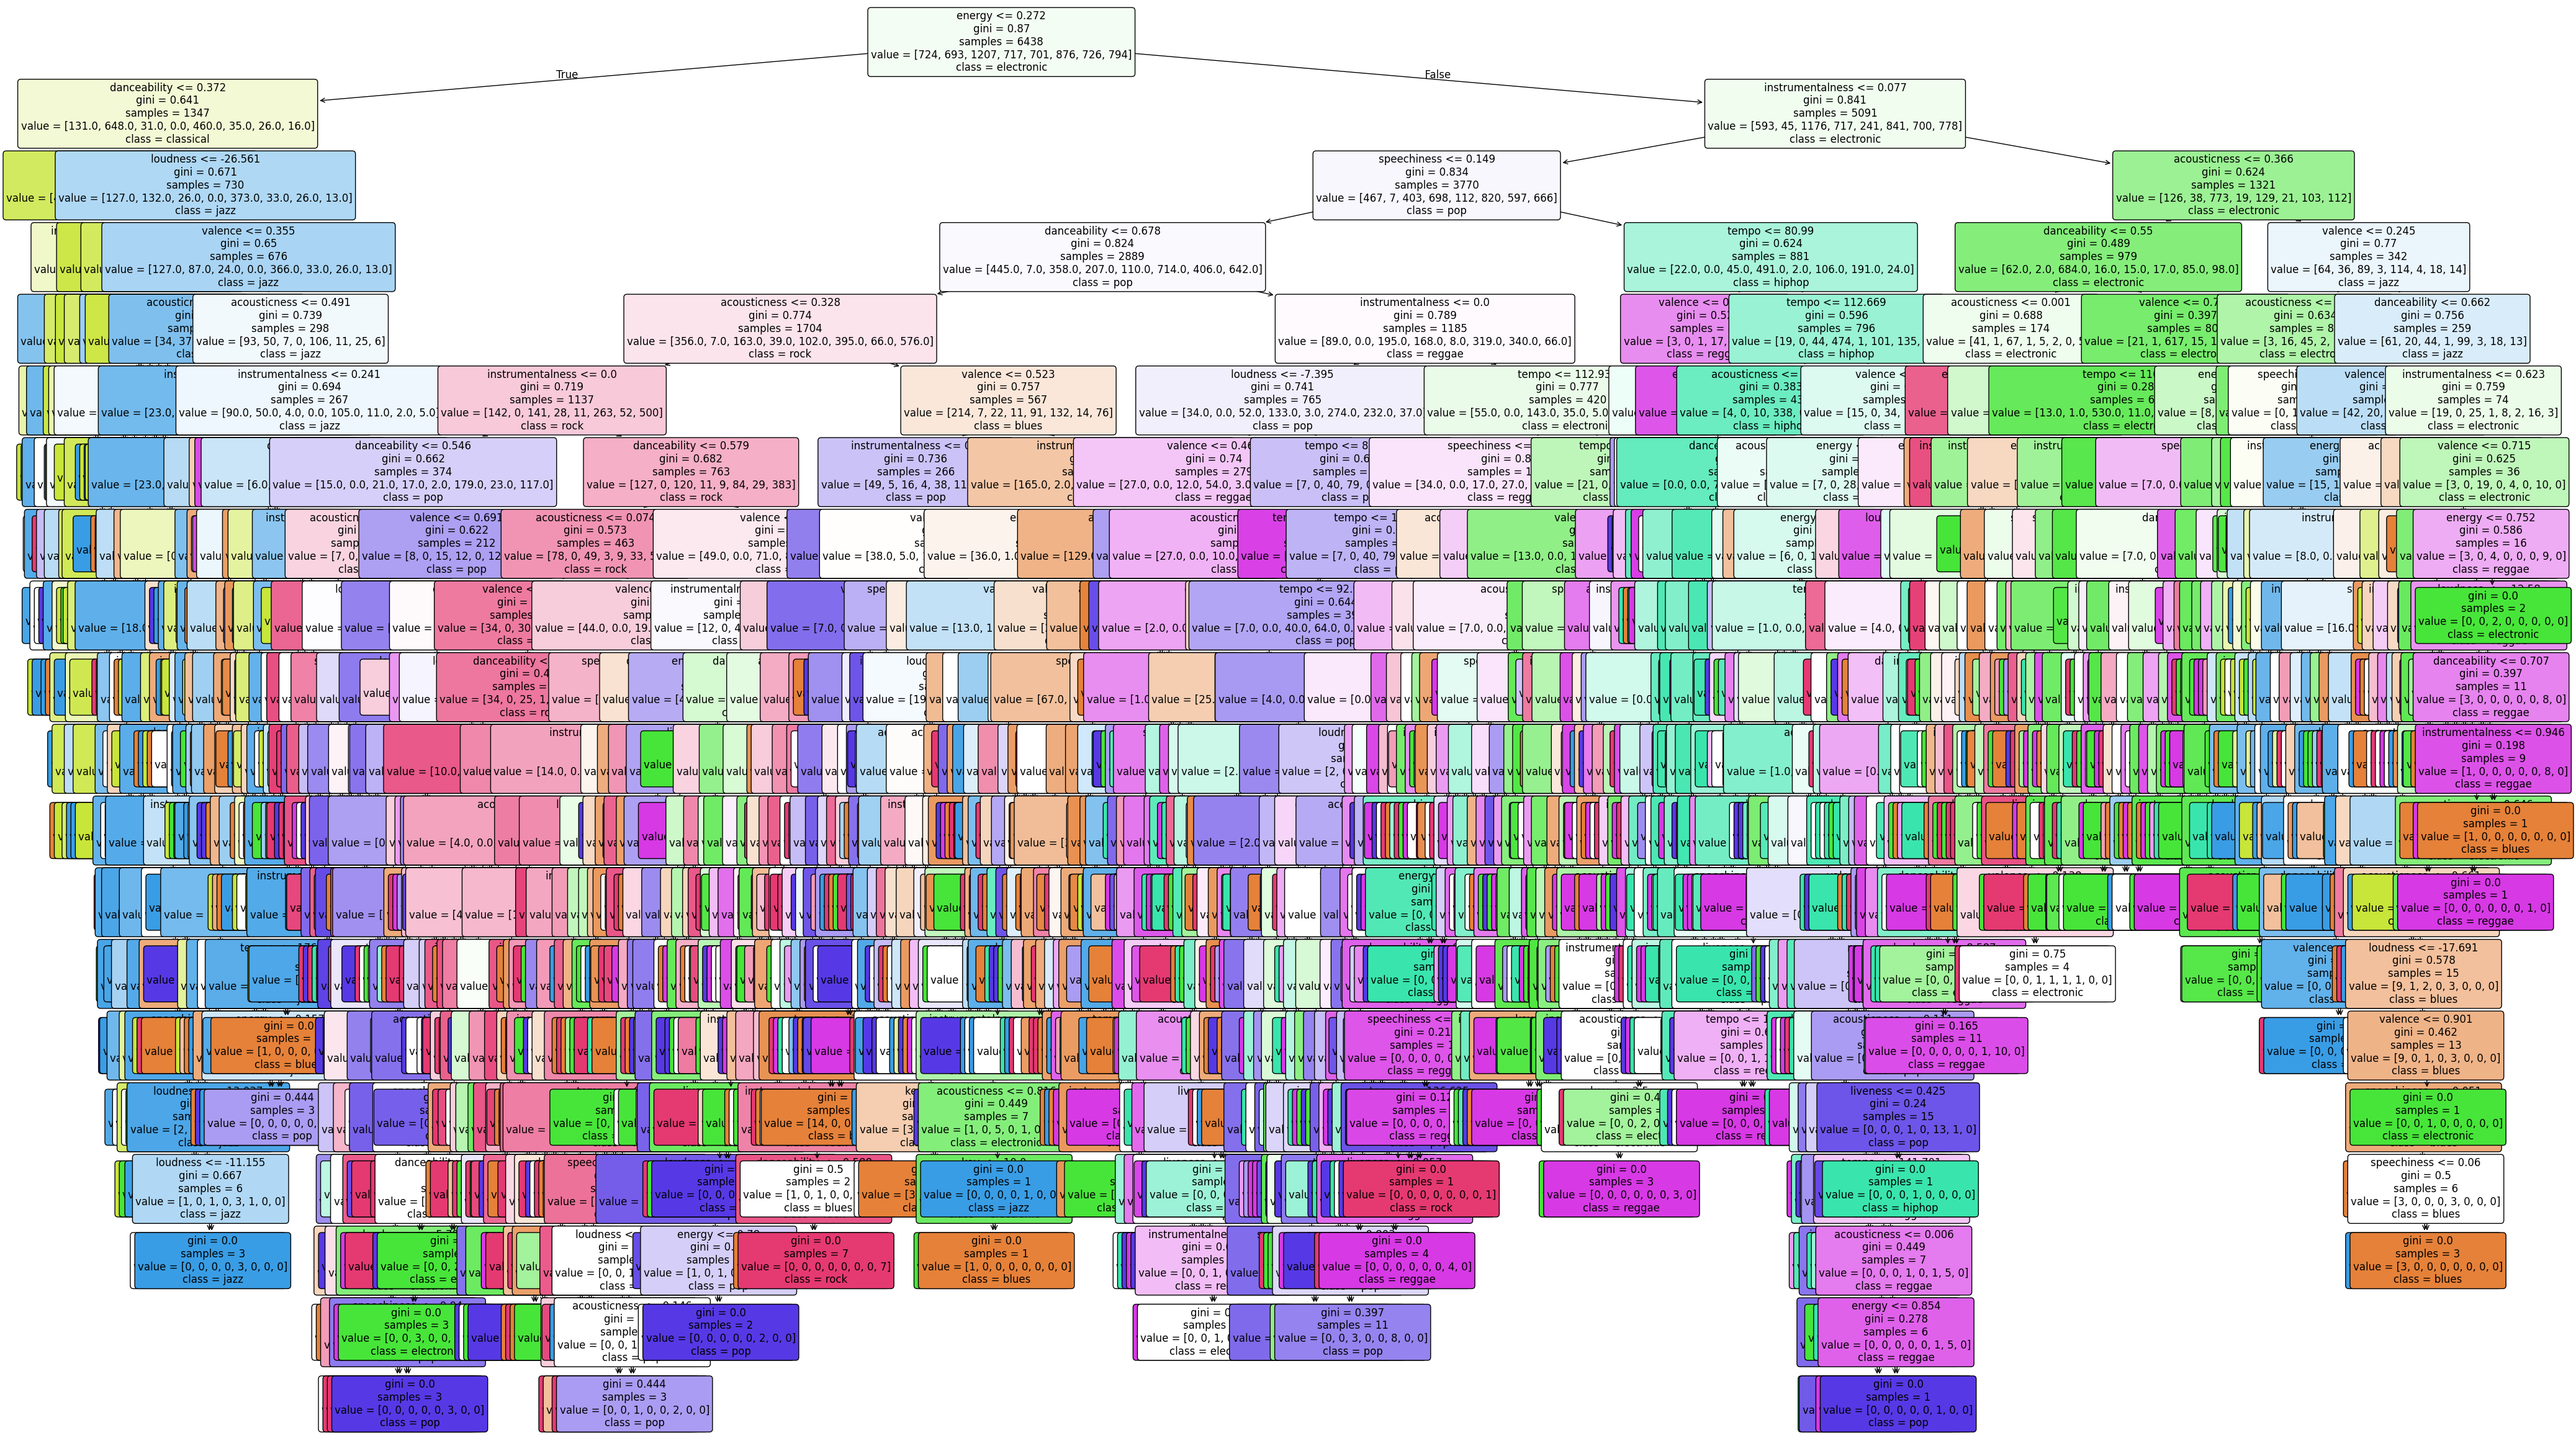

In [36]:
# Create a complex decision tree model
# YOUR CODE HERE
complex_model = DecisionTreeClassifier(max_leaf_nodes=1000, random_state = 1)

# Train the model on our training data
# YOUR CODE HERE
complex_model.fit(X_train, y_train)
# Let's visualize the tree!
plt.figure(figsize=(50, 30))
plot_tree(complex_model,
          feature_names=features,
          class_names=sorted(y.unique()),
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()

In [37]:
# Get predictions on the validation data
# YOUR CODE HERE
val_predictions = complex_model.predict(X_val)

# Check the accuracy
# YOUR CODE HERE
accuracy = accuracy_score(y_val, val_predictions)

print(f"Accuracy for a tree with 1000 leaves: {accuracy:.4f}")

Accuracy for a tree with 1000 leaves: 0.5755


Our goal is to find the "sweet spot" that balances simplicity and accuracy. We do this by iterating:
1.  **Train** a model with a specific complexity (e.g., `max_leaf_nodes=20`).
2.  **Validate** its performance on the validation set (`X_val`, `y_val`).
3.  Repeat this for many different complexity settings.
4.  Choose the setting that gave the best validation score.

#### **Step 1 & 2: A Single Manual Iteration**

Let's see how one cycle of this process works. We'll pick `max_leaf_nodes=20` and see what accuracy we get on the validation set.

In [38]:
# Create a model with a specific number of leaf nodes
# YOUR CODE HERE
model_20_leaves = DecisionTreeClassifier(max_leaf_nodes = 20, random_state = 1)

# Train it on the training data
# YOUR CODE HERE
model_20_leaves.fit(X_train, y_train)

# Get predictions on the validation data
# YOUR CODE HERE
val_predictions = model_20_leaves.predict(X_val)

# Check the accuracy
# YOUR CODE HERE
accuracy = accuracy_score(y_val, val_predictions)
print(f"Accuracy for a tree with 20 leaves: {accuracy:.4f}")

Accuracy for a tree with 20 leaves: 0.5489


#### **Step 3: Automating the Iteration with a Loop**

Doing this manually for every possible setting would be tedious. Let's create a loop to test a range of `max_leaf_nodes` values and store each result.

In [39]:
# Define a range of leaf node values to test
candidate_max_leaf_nodes = list(range(5, 201, 10))
validation_scores = {}

for leaf_nodes in candidate_max_leaf_nodes:
    # Create and train the model
    model = DecisionTreeClassifier(max_leaf_nodes=leaf_nodes, random_state=1)
    model.fit(X_train, y_train)

    # Get predictions and score
    val_preds = model.predict(X_val)
    score = accuracy_score(y_val, val_preds)

    # Store the score
    validation_scores[leaf_nodes] = score

    print(f"Max leaf nodes: {leaf_nodes} \t\t Validation Accuracy: {score:.4f}")

Max leaf nodes: 5 		 Validation Accuracy: 0.4527
Max leaf nodes: 15 		 Validation Accuracy: 0.5332
Max leaf nodes: 25 		 Validation Accuracy: 0.5560
Max leaf nodes: 35 		 Validation Accuracy: 0.5821
Max leaf nodes: 45 		 Validation Accuracy: 0.6005
Max leaf nodes: 55 		 Validation Accuracy: 0.6054
Max leaf nodes: 65 		 Validation Accuracy: 0.6092
Max leaf nodes: 75 		 Validation Accuracy: 0.6076
Max leaf nodes: 85 		 Validation Accuracy: 0.6038
Max leaf nodes: 95 		 Validation Accuracy: 0.6011
Max leaf nodes: 105 		 Validation Accuracy: 0.5929
Max leaf nodes: 115 		 Validation Accuracy: 0.5962
Max leaf nodes: 125 		 Validation Accuracy: 0.5984
Max leaf nodes: 135 		 Validation Accuracy: 0.5946
Max leaf nodes: 145 		 Validation Accuracy: 0.6011
Max leaf nodes: 155 		 Validation Accuracy: 0.6033
Max leaf nodes: 165 		 Validation Accuracy: 0.6049
Max leaf nodes: 175 		 Validation Accuracy: 0.6022
Max leaf nodes: 185 		 Validation Accuracy: 0.5984
Max leaf nodes: 195 		 Validation Accuracy

#### **Step 4: Visualizing the Results to Find the Sweet Spot**

A great way to see the sweet spot is to plot the results. We are looking for the point where the accuracy is highest.

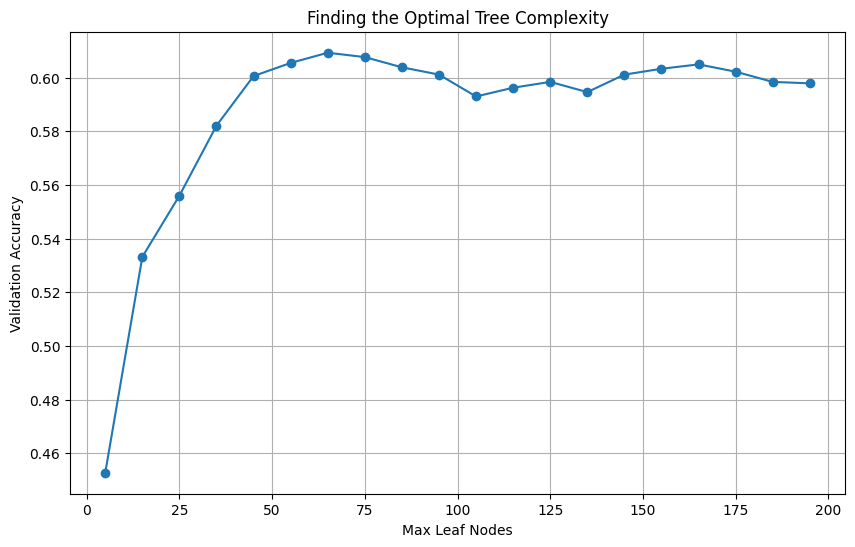

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(list(validation_scores.keys()), list(validation_scores.values()), marker='o')
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Validation Accuracy")
plt.title("Finding the Optimal Tree Complexity")
plt.grid(True)
plt.show()

### **6. The Moment of Truth: The Final Evaluation on the Test Set**

From the loop and the chart, we can see which `max_leaf_nodes` value gave the best performance on the validation data. Now, and only now, we use the **test set** to get a final, unbiased score for our best model.

In [41]:
# Find the best number of leaf nodes from our loop of different max_leaf_nodes
best_tree_size = 65

# Create and train the final model using the best parameter
final_model = DecisionTreeClassifier(max_leaf_nodes=best_tree_size, random_state=1)
final_model.fit(X_train, y_train)

# Get predictions on the test set (the data we've never touched before)
test_preds = final_model.predict(X_test)

# Calculate the final accuracy score
final_accuracy = accuracy_score(y_test, test_preds)

print(f"Final Accuracy on the unseen Test Set: {final_accuracy:.4f}")

Final Accuracy on the unseen Test Set: 0.5924


## Make it Better!

Changing the complexity of the decision tree (`max_leaf_nodes`) is an important way to improve the performance of the model and increase generalizability. However, there are other "dials" you can turn.

### Challenge 1: Experiment with Features

We chose a specific set of features to train our model, but are they the best ones?

Try adding or removing features from your features list.

Create a new `X` with your new chosen features and run it through the training and validation process to see if your score improves.

### Challenge 2: Tune Different Hyperparameters

We only tuned `max_leaf_nodes`, but Decision Trees have other important settings, called **hyperparameters** you can adjust to control their complexity.

`min_samples_leaf`: The minimum number of songs that must be in a final leaf node. A higher number prevents the model from making decisions based on just one or two songs, which helps fight overfitting.

`max_depth`: The maximum number of "if-then" questions the tree can ask in a row.

These hyperparameters can be set with additional arguments after `max_leaf_nodes=` in the `DecisionTreeClassifier` function.

In [108]:
# Create a model with a specific number of leaf nodes
# YOUR CODE HERE
model_20_leaves = DecisionTreeClassifier(max_leaf_nodes = 65, random_state = 1, min_samples_leaf=5)

# Train it on the training data
# YOUR CODE HERE
model_20_leaves.fit(X_train, y_train)

# Get predictions on the validation data
# YOUR CODE HERE
val_predictions = model_20_leaves.predict(X_val)

# Check the accuracy
# YOUR CODE HERE
accuracy = accuracy_score(y_val, val_predictions)
print(f"Accuracy for a tree with 20 leaves: {accuracy:.15f}")

# Find the best number of leaf nodes from our loop of different max_leaf_nodes
best_tree_size = 65

# Create and train the final model using the best parameter
final_model = DecisionTreeClassifier(max_leaf_nodes=best_tree_size, random_state=1, min_samples_leaf=30)
final_model.fit(X_train, y_train)

# Get predictions on the test set (the data we've never touched before)
test_preds = final_model.predict(X_test)

# Calculate the final accuracy score
final_accuracy = accuracy_score(y_test, test_preds)

print(f"Final Accuracy on the unseen Test Set: {final_accuracy:.4f}")

Accuracy for a tree with 20 leaves: 0.611413043478261
Final Accuracy on the unseen Test Set: 0.5989
